### This notebook contains the exercises from the SQL training week conducted by Kaggle.
### It uses public tables in Google's Big Query database

In [88]:
pd.set_option('display.max_columns', 999)

# Imports the Google Cloud client library
from google.cloud import bigquery

import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/home/asanzgiri/Big-Query-23c4a79792b7.json'

# Instantiates a client
bigquery_client = bigquery.Client()

In [11]:
import pandas as pd
import bq_helper

### Day 1

In [12]:
open_aq = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="openaq")

In [13]:
open_aq.list_tables()

['global_air_quality']

In [14]:
open_aq.head("global_air_quality", num_rows=3)

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours
0,Mobile_Cle Elum,037,US,pm25,0.0,2017-09-26 20:00:00+00:00,µg/m³,AirNow,47.197630,-120.95823,1.0
1,Mobile_WhiteSalmon,039,US,pm25,0.0,2017-09-26 20:00:00+00:00,µg/m³,AirNow,45.732414,-121.49233,1.0
2,Mobile_Newport,051,US,pm25,0.0,2017-09-21 18:00:00+00:00,µg/m³,AirNow,48.186485,-117.04916,1.0


In [15]:
query = """SELECT city
            FROM `bigquery-public-data.openaq.global_air_quality`
            WHERE country = 'US'
        """
us_cities = open_aq.query_to_pandas_safe(query)
us_cities.city.value_counts().head()

Phoenix-Mesa-Scottsdale                     85
Houston                                     79
Los Angeles-Long Beach-Santa Ana            60
New York-Northern New Jersey-Long Island    57
Riverside-San Bernardino-Ontario            56
Name: city, dtype: int64

In [19]:
query = """SELECT distinct(country) as country, unit
            FROM `bigquery-public-data.openaq.global_air_quality`
            WHERE unit != 'ppm'
        """
countries = open_aq.query_to_pandas_safe(query)

In [23]:
countries.head()

,country,unit
0,MT,µg/m³
1,KW,µg/m³
2,FI,µg/m³
3,CL,µg/m³
4,UG,µg/m³


In [25]:
query = """SELECT distinct(pollutant)
            FROM `bigquery-public-data.openaq.global_air_quality`
            WHERE value=0.0
        """
pollutants = open_aq.query_to_pandas_safe(query)
pollutants.head()

,pollutant
0,pm25
1,so2
2,no2
3,o3
4,co


### Day 2

In [26]:
# create a helper object for this dataset
hacker_news = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="hacker_news")

# print the first couple rows of the "comments" table
hacker_news.head("comments")

,id,by,author,time,time_ts,text,parent,deleted,dead,ranking
0,2701393,5l,5l,1309184881,2011-06-27 14:28:01+00:00,And the glazier who fixed all the broken windo...,2701243,None,None,0
1,5811403,99,99,1370234048,2013-06-03 04:34:08+00:00,Does canada have the equivalent of H1B/Green c...,5804452,None,None,0
2,21623,AF,AF,1178992400,2007-05-12 17:53:20+00:00,"Speaking of Rails, there are other options in ...",21611,None,None,0
3,10159727,EA,EA,1441206574,2015-09-02 15:09:34+00:00,Humans and large livestock (and maybe even pet...,10159396,None,None,0
4,2988424,Iv,Iv,1315853580,2011-09-12 18:53:00+00:00,I must say I reacted in the same way when I re...,2988179,None,None,0


In [27]:
query = """SELECT parent, COUNT(id)
            FROM `bigquery-public-data.hacker_news.comments`
            GROUP BY parent
            HAVING COUNT(id) > 10
        """
popular_stories = hacker_news.query_to_pandas_safe(query)
popular_stories.head()

,parent,f0_
0,5371725,258
1,7833250,259
2,3652041,260
3,2403696,261
4,6889613,11


In [30]:
hacker_news.list_tables()

['comments', 'full', 'full_201510', 'stories']

In [36]:
query = """SELECT type, COUNT(id) as count
            FROM `bigquery-public-data.hacker_news.full`
            GROUP BY type
        """
count_types = hacker_news.query_to_pandas_safe(query)
count_types.head()

,type,count
0,story,2848843
1,comment,13508794
2,job,10176
3,pollopt,11806
4,poll,1728


In [40]:
query = """SELECT count(id) as count
            FROM `bigquery-public-data.hacker_news.comments`
            where deleted = True
        """
deleted_comments = hacker_news.query_to_pandas_safe(query)
deleted_comments.head()

,count
0,227736


In [90]:
query = """SELECT  
            countif(type = 'story') as count
            FROM `bigquery-public-data.hacker_news.full`
            where type = 'story'
        """
count_types = hacker_news.query_to_pandas_safe(query)
count_types.head()

,count
0,2848843


In [89]:
query = """SELECT countif(deleted = True) as count
            FROM `bigquery-public-data.hacker_news.comments`
            where deleted = True
        """
deleted_comments = hacker_news.query_to_pandas_safe(query)
deleted_comments.head()

,count
0,227736


### Day 3

In [48]:
accidents = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                   dataset_name="nhtsa_traffic_fatalities")

query = """SELECT COUNT(consecutive_number), 
                  EXTRACT(DAYOFWEEK FROM timestamp_of_crash)
            FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
            GROUP BY EXTRACT(DAYOFWEEK FROM timestamp_of_crash)
            ORDER BY COUNT(consecutive_number) DESC
        """

accidents_by_day = accidents.query_to_pandas_safe(query)

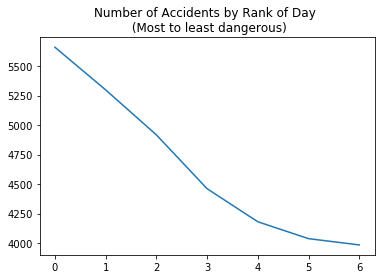

In [49]:
# library for plotting
import matplotlib.pyplot as plt

# make a plot to show that our data is, actually, sorted:
plt.plot(accidents_by_day.f0_)
plt.title("Number of Accidents by Rank of Day \n (Most to least dangerous)")
plt.show()

In [50]:
accidents.list_tables()

['accident_2015',
 'accident_2016',
 'cevent_2015',
 'cevent_2016',
 'damage_2015',
 'damage_2016',
 'distract_2015',
 'distract_2016',
 'drimpair_2015',
 'drimpair_2016',
 'factor_2015',
 'factor_2016',
 'maneuver_2015',
 'maneuver_2016',
 'nmcrash_2015',
 'nmcrash_2016',
 'nmimpair_2015',
 'nmimpair_2016',
 'nmprior_2015',
 'nmprior_2016',
 'parkwork_2015',
 'parkwork_2016',
 'pbtype_2015',
 'pbtype_2016',
 'person_2015',
 'person_2016',
 'safetyeq_2015',
 'safetyeq_2016',
 'vehicle_2015',
 'vehicle_2016',
 'vevent_2015',
 'vevent_2016',
 'vindecode_2015',
 'vindecode_2016',
 'violatn_2015',
 'violatn_2016',
 'vision_2015',
 'vision_2016',
 'vsoe_2015',
 'vsoe_2016']

In [51]:
accidents.head('accident_2016')

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,19,Iowa,190192,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,0,2016-08-06 00:55:00+00:00
1,19,Iowa,190028,1,1,0,0,0,6,6,...,99,0,None,0,None,0,None,1,0,2016-02-13 14:16:00+00:00
2,19,Iowa,190038,1,1,0,0,0,5,5,...,99,0,None,0,None,0,None,1,0,2016-03-05 21:38:00+00:00
3,19,Iowa,190146,1,1,0,0,0,1,1,...,99,0,None,0,None,0,None,1,0,2016-06-24 18:47:00+00:00
4,19,Iowa,190043,1,1,0,0,0,1,1,...,45,0,None,0,None,0,None,1,0,2016-03-16 15:18:00+00:00


In [54]:
accidents.table_schema('accident_2016')

[SchemaField('state_number', 'integer', 'NULLABLE', 'This data element identifies the state in which the crash occurred. The codes are from the General Services Administration’s (GSA) publication of worldwide Geographic Location Codes (GLC). For more info on the codes, please look at <C1/V1/D1/PC1/P1/NM1 State Number> section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315', ()),
 SchemaField('state_name', 'string', 'NULLABLE', 'This data element identifies the state in which the crash occurred. The codes are from the General Services Administration’s (GSA) publication of worldwide Geographic Location Codes (GLC).', ()),
 SchemaField('consecutive_number', 'integer', 'NULLABLE', 'This data element is the unique case number assigned to each crash. It appears on each data file and is used to merge information from the data files together. xxxxxx Two Characters for State Code followed by Four Characters for Case Number', ()),
 SchemaField('number_of_vehicle_f

In [71]:
query = """SELECT COUNT(consecutive_number) as num_accidents, 
                  EXTRACT(HOUR FROM timestamp_of_crash) as hour
            FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
            GROUP BY hour
            ORDER BY num_accidents DESC
        """

accidents_by_hour = accidents.query_to_pandas_safe(query)

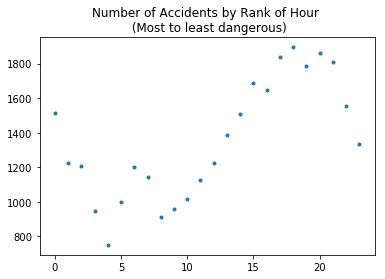

In [75]:
plt.plot( accidents_by_hour.hour, accidents_by_hour.num_accidents, '.')
plt.title("Number of Accidents by Rank of Hour \n (Most to least dangerous)")
plt.show()

In [64]:
accidents_by_hour.head()

,count,hour
0,1895,18
1,1862,20
2,1838,17
3,1811,21
4,1784,19


In [87]:
query = """SELECT countif(hit_and_run = 'Yes') as total_hit_and_runs, 
                  registration_state_name as state
            FROM `bigquery-public-data.nhtsa_traffic_fatalities.vehicle_2016`
            GROUP BY state
            ORDER BY total_hit_and_runs DESC
            limit 5
        """

hit_and_runs_by_state = accidents.query_to_pandas_safe(query)
hit_and_runs_by_state.head(5)

,total_hit_and_runs,state
0,929,Unknown
1,167,California
2,107,Texas
3,94,Florida
4,44,Georgia


In [81]:
pd.set_option('display.max_columns', 999)
accidents.head("vehicle_2016")

,state_number,consecutive_number,vehicle_number,number_of_motor_vehicles_in_transport_mvit,number_of_occupants,day_of_crash,month_of_crash,hour_of_crash,minute_of_crash,first_harmful_event,first_harmful_event_name,manner_of_collision,unit_type,hit_and_run,registration_state,registration_state_name,registered_vehicle_owner,registered_vehicle_owner_name,vehicle_make,vehicle_make_name,vehicle_model,make_model_combined,body_type,body_type_name,vehicle_model_year,vehicle_identification_number_vin,vin_character_1,vin_character_2,vin_character_3,vin_character_4,vin_character_5,vin_character_6,vin_character_7,vin_character_8,vin_character_9,vin_character_10,vin_character_11,vin_character_12,vehicle_trailing,jackknife,mcid_issuing_authority,mcid_identification_number,motor_carrier_identification_number_mcid,gross_vehicle_weight_rating,vehicle_configuration,vehicle_configuration_name,cargo_body_type,cargo_body_type_name,hazardous_material_involvement,hazardous_material_placard,hazardous_material_identification_number,hazardous_material_class_number,release_of_hazardous_material_from_the_cargo_compartment,bus_use,special_use,special_use_name,emergency_motor_vehicle_use,travel_speed,underride_override,rollover,location_of_rollover,initial_contact_point,extent_of_damage,vehicle_removal,most_harmful_event,related_factors_vehicle_level_1,related_factors_vehicle_level_2,fire_occurrence,driver_presence,drivers_license_state,drivers_zip_code,non_cdl_license_status,non_cdl_license_type,commercial_motor_vehicle_license_status,compliance_with_cdl_endorsements,license_compliance_with_class_of_vehicle,compliance_with_license_restrictions,driver_height,driver_weight,previous_recorded_crashes,previous_recorded_suspensions_and_revocations,previous_dwi_convictions,previous_speeding_convictions,previous_other_moving_violation_convictions,month_of_first_crash_suspension_or_conviction,year_of_first_crash_suspension_or_conviction,month_of_last_crash_suspension_or_conviction,year_of_last_crash_suspension_or_conviction,speeding_related,related_factors_driver_level_1,related_factors_driver_level_2,related_factors_driver_level_3,related_factors_driver_level_4,trafficway_description,total_lanes_in_roadway,speed_limit,roadway_alignment,roadway_grade,roadway_surface_type,roadway_surface_condition,roadway_surface_condition_name,traffic_control_device,traffic_control_device_functioning,pre_event_movement_prior_to_recognition_of_critical_event,critical_event_precrash,critical_event_precrash_name,attempted_avoidance_maneuver,attempted_avoidance_maneuver_name,pre_impact_stability,pre_impact_location,crash_type,crash_type_name,fatalities_in_vehicle,driver_drinking,timestamp_of_crash
0,6,61700,1,1,2,7,8,2,36,5,Fell/Jumped from Vehicle,0,Motor Vehicle in Transport (Inside or Outside ...,No,6,California,2,Driver (of This Vehicle) Not Registered Owner ...,7,Dodge,28,7028,2,2-Door Sedan/Hardtop/Coupe,2013,,,,,,,,,,,,,,No Trailing Unit,Not an Articulated Vehicle,0,0,0,Not Applicable,0,Not Applicable,0,Not Applicable,No,0,0,0,Not Applicable,Not a Bus,0,No Special Use,Not Applicable,998,0,No Rollover,No Rollover,0,No Damage,Not Towed,5,0,0,No or Not Reported,Yes,6,95307,0,Not Licensed,0,No Endorsements Required For This Vehicle,Not Licensed,0,67,200,99,99,99,99,99,99,9999,99,9999,No,0,0,0,0,"Two-Way, Divided, Unprotected (Painted > One-W...",3,50,Straight,Level,"Blacktop, Bituminous, or Asphalt",1,Dry,3,Device Functioning Properly,3,98,Other Critical Precrash Event,1,No Avoidance Maneuver,Tracking,3,0,No Impact,1,Drinking,2016-08-07 02:36:00+00:00
1,32,320154,1,1,1,19,7,9,45,1,Rollover/Overturn,0,Motor Vehicle in Transport (Inside or Outside ...,No,92,No Registration,5,Vehicle Was Stolen (Reported By Police),76,Yamaha,709,76709,80,Motorcycle,2015,,,,,,,,,,,,,,No Trailing Unit,Not an Articulated Vehicle,0,0,0,Not Applicable,0,Not Applicable,0,Not Applicable,No,0,0,0,Not Applicable,Not a Bus,0,No Special Use,Not Applicable,28,0,No Rollover,No Rollover,0,Disabling Damage,Towed Due

### Day 4

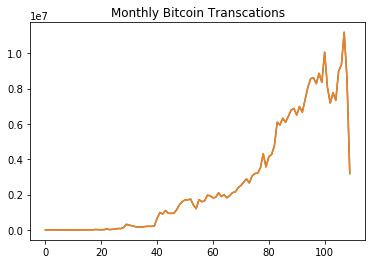

In [92]:
bitcoin_blockchain = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                              dataset_name="bitcoin_blockchain")
query = """ WITH time AS 
            (
                SELECT TIMESTAMP_MILLIS(timestamp) AS trans_time,
                    transaction_id
                FROM `bigquery-public-data.bitcoin_blockchain.transactions`
            )
            SELECT COUNT(transaction_id) AS transactions,
                EXTRACT(MONTH FROM trans_time) AS month,
                EXTRACT(YEAR FROM trans_time) AS year
            FROM time
            GROUP BY year, month 
            ORDER BY year, month
        """

transactions_per_month = bitcoin_blockchain.query_to_pandas_safe(query, max_gb_scanned=21)

# plot monthly bitcoin transactions
plt.plot(transactions_per_month.transactions)
plt.title("Monthly Bitcoin Transcations")
plt.show()

In [95]:
query = """ WITH time AS 
            (
                SELECT TIMESTAMP_MILLIS(timestamp) AS trans_time,
                    transaction_id
                FROM `bigquery-public-data.bitcoin_blockchain.transactions`
            )
            SELECT COUNT(transaction_id) AS transactions,
                EXTRACT(DAYOFYEAR FROM trans_time) AS day
            FROM time
            GROUP BY DAY
            ORDER BY DAY asc
        """

transactions_by_day = bitcoin_blockchain.query_to_pandas_safe(query, max_gb_scanned=21)

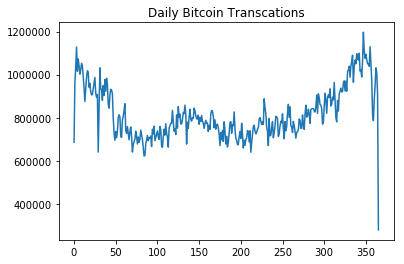

In [96]:
# plot monthly bitcoin transactions
plt.plot(transactions_by_day.transactions)
plt.title("Daily Bitcoin Transcations")
plt.show()

In [97]:
bitcoin_blockchain.head('transactions')

,timestamp,transaction_id,inputs,outputs,block_id,previous_block,merkle_root,nonce,version,work_terahash,work_error
0,1342700648000,34d02165deccf975adf794b20c50232beef323db2aba2c...,"[{'input_script_bytes': b""G0D\x02 \x174^\xf9h\...","[{'output_satoshis': 20000000, 'output_script_...",00000000000004af0abd75edbff2ec57b4aef7d038f06d...,00000000000007e2bfdfd1abc32dc643687590b87f1aa5...,cb523a136f5e436fa7825576804d8d743e8a35986c8303...,4067977512,1,80162,None
1,1492416462000,489a5e24127d9132391a8f0ec1e520f3d02739256f106a...,[{'input_script_bytes': b'\x00H0E\x02!\x00\xef...,"[{'output_satoshis': 85299, 'output_script_byt...",0000000000000000002ff0e728133831852abd7beb707d...,00000000000000000023368ccbd24141b5ada9ef2d88b3...,087fb41cdaf89f3b1d0a5041fa68a6bf1964ca3a55547a...,2673578431,536870914,22368906784,None
2,1431584952000,ba32b78b34b7d136007f0c1cce9e9d8197e01bf64cecfe...,[{'input_script_bytes': b'H0E\x02!\x00\xed#\x0...,"[{'output_satoshis': 200000, 'output_script_by...",00000000000000000c5d6092dc994121b26ed3adce49a1...,0000000000000000059c2ef5ae156ff3f25cf6b10271cd...,2de3389e8de994e472070c3a10012c55b42da567dad95c...,389709700,2,2046299587,None
3,1422976539000,c3aecb42e60ca5bcc1d02ef2980000a10df361d118045d...,[{'input_script_bytes': b'H0E\x02!\x00\xbb\x0c...,"[{'output_satoshis': 276377293, 'output_script...",000000000000000008814b1a6d7616152aa4923fa833db...,00000000000000000f3b37620802ecfbac68cb942383cb...,c829aae3ef400f5fe60257fad9d0c162167dadb0636ba8...,239143653,2,1772683484,None
4,1511602141000,17744f9facc5f547dd7d25c983a11d5a0cc4b4602292ee...,[{'input_script_bytes': b'G0D\x02 \x01\x1b\xb9...,"[{'output_satoshis': 22911640, 'output_script_...",0000000000000000001e5561afe1441c66627c0c545287...,000000000000000000b2bc34f35228cb5c5e0e444b86a4...,0b1ff25e0fcf82215b4d8ae3a3ef62d187d1623fe63be5...,3728815676,536870912,57854153703,None


In [100]:
query = """ 
            SELECT merkle_root, count(transaction_id) as trans_count
            FROM `bigquery-public-data.bitcoin_blockchain.transactions`
            group by merkle_root
            order by trans_count desc
        """

transactions_by_merkle_root = bitcoin_blockchain.query_to_pandas_safe(query, max_gb_scanned=40)
transactions_by_merkle_root.head()

,merkle_root,trans_count
0,dc1bde29f6912ba825138118676988a0e7f839054155db...,12239
1,03ef22104e4561d1c8198015157aa80ec08f1aaef676bf...,9647
2,52461d6e9d181204112ee8ca440921d5df88763ddb6e86...,6451
3,60f1b83982cd4588a8a99b66bb24c5e6d7bb15d34c6a90...,6144
4,73733e699f12f312843b99b309d65ac499c57507d2120f...,6084


### Day 5

In [101]:
github = bq_helper.BigQueryHelper(active_project="bigquery-public-data",
                                              dataset_name="github_repos")

query = ("""
        -- Select all the columns we want in our joined table
        SELECT L.license, COUNT(sf.path) AS number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` as sf
        -- Table to merge into sample_files
        INNER JOIN `bigquery-public-data.github_repos.licenses` as L 
            ON sf.repo_name = L.repo_name -- what columns should we join on?
        GROUP BY L.license
        ORDER BY number_of_files DESC
        """)

file_count_by_license = github.query_to_pandas_safe(query, max_gb_scanned=6)
print(file_count_by_license)

         license  number_of_files
0        gpl-2.0         22031724
1            mit         21186498
2     apache-2.0          7578582
3        gpl-3.0          5550163
4   bsd-3-clause          3319394
5       agpl-3.0          1435105
6       lgpl-2.1           962034
7   bsd-2-clause           779810
8       lgpl-3.0           684163
9        mpl-2.0           504080
10       cc0-1.0           437764
11       epl-1.0           389338
12     unlicense           209350
13  artistic-2.0           155854
14           isc           133570


In [102]:
github.head('sample_commits')

,commit,tree,parent,author,committer,subject,message,trailer,difference,difference_truncated,repo_name,encoding
0,3eca86e75ec7a7d4b9a9c8091b11676f7bd2a39f,8e1b4380409a85a922ee0d3f622b5dd4d16bcfad,[104a0c02e8b1936c049e18a6d4e4ab040fb61213],"{'name': 'Mark Rutland', 'email': '1db9dd262be...","{'name': 'Catalin Marinas', 'email': '15ce75b2...",arm64: Remove fixmap include fragility,arm64: Remove fixmap include fragility\n\nThe ...,"[{'key': 'Signed-off-by', 'value': 'Mark Rutla...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",None,torvalds/linux,None
1,7158627686f02319c50c8d9d78f75d4c8d126ff2,3b4d781bd966f07cad1b67b137f0ff8b89430e9a,[66aa8d6a145b6a66566b4fce219cc56c3d0e01c3],"{'name': 'Will Deacon', 'email': 'b913f13ef92a...","{'name': 'Catalin Marinas', 'email': '15ce75b2...",arm64: percpu: implement optimised pcpu access...,arm64: percpu: implement optimised pcpu access...,"[{'key': 'Signed-off-by', 'value': 'Will Deaco...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",None,torvalds/linux,None
2,9732cafd9dc0206479be919baf0067239f0a63ca,c8878035ac9cb6dce592957f12dc1723a583989d,[f3c003f72dfb2497056bcbb864885837a1968ed5],"{'name': 'Jiang Liu', 'email': 'c745fa7b96fe79...","{'name': 'Catalin Marinas', 'email': '15ce75b2...","arm64, jump label: optimize jump label impleme...","arm64, jump label: optimize jump label impleme...","[{'key': 'Reviewed-by', 'value': 'Will Deacon ...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",None,torvalds/linux,None
3,4702abd3f9728893ad5b0f4389e1902588510459,32926e7c55ef585d9b9c174a0e5f9ed13ed6bf7e,[ddf28352b80c86754a6424e3a61e8bdf9213b3c7],"{'name': 'Nicolas Pitre', 'email': '408789a210...","{'name': 'Arnd Bergmann', 'email': 'f2c659f019...",ARM: mach-nuc93x: delete,ARM: mach-nuc93x: delete\n\nThis architecture ...,"[{'key': 'Signed-off-by', 'value': 'Nicolas Pi...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",None,torvalds/linux,None
4,57bd4b91a6cfc5bad4c5d829ef85293ea63643ea,2ffc2066eb7638e185663e9d849663403229d4e5,[f74c95c20bad8e183e41283475f68a3e7b247af4],"{'name': 'Ben Dooks', 'email': '1177f64998f284...","{'name': 'Ben Dooks', 'email': '1177f64998f284...",[ARM] S3C24XX: Movev udc headers to arch/arm/p...,[ARM] S3C24XX: Movev udc headers to arch/arm/p...,"[{'key': 'Signed-off-by', 'value': 'Ben Dooks ...","[{'old_mode': 33188, 'new_mode': 33188, 'old_p...",None,torvalds/linux,None


In [103]:
github.head('sample_files')

,repo_name,ref,path,mode,id,symlink_target
0,git/git,refs/heads/master,RelNotes,40960,62615ffa4e97803da96aefbc798ab50f949a8db7,Documentation/RelNotes/2.10.0.txt
1,np/ling,refs/heads/master,tests/success/plug_compose.t/plug_compose.ll,40960,0c1605e4b447158085656487dc477f7670c4bac1,../../../fixtures/all/plug_compose.ll
2,np/ling,refs/heads/master,fixtures/strict-par-success/parallel_assoc_lef...,40960,b59bff84ec03d12fabd3b51a27ed7e39a180097e,../all/parallel_assoc_left.ll
3,np/ling,refs/heads/master,fixtures/sequence/parallel_assoc_2tensor2_left.ll,40960,f29523e3fb65702d99478e429eac6f801f32152b,../all/parallel_assoc_2tensor2_left.ll
4,np/ling,refs/heads/master,fixtures/success/my_dual.ll,40960,38a3af095088f90dfc956cb990e893909c3ab286,../all/my_dual.ll


In [110]:
query = """
select a.repo_name, count(a.id) as num_commits
from `bigquery-public-data.github_repos.sample_files` as a
inner join  `bigquery-public-data.github_repos.sample_commits` as b
on a.repo_name = b.repo_name
where a.path like '%.py'
group by a.repo_name
order by num_commits desc
"""

python_commits = github.query_to_pandas_safe(query, max_gb_scanned=9)
print(python_commits)

               repo_name  num_commits
0         torvalds/linux     23501556
1  tensorflow/tensorflow      4128858
2            apple/swift      4044664
3         facebook/react        13750
4       Microsoft/vscode         6909
